In [ ]:
pip install gensim

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import random
import os
from os import path
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
sns.set_palette(
    [
        '#30a2da',
        '#fc4f30',
        '#e5ae38',
        '#6d904f',
        '#8b8b8b'
    ]

)

import string
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop(columns = 'Unnamed: 0',inplace = True,axis = 1)
#deleting missing observations for following obseravtions
for val in ['Review Text','Division Name','Department Name','Department Name','Class Name']:
    df = df[df[val].notnull()]
# creting an array which consists of [column name,unique counts,missing counts]
unique_counts = []
for val in df.columns:
    unique_counts.append([val,len(df[val].unique()),df[val].isnull().sum()])
# lets print total number of missing values after removing the missing values
print('Missing values are {}'.format(df.isnull().sum().sum()))
# lets print the dimension of the given dataframe 
print('The dataset consists of {} Rows and {} columns'.format(*df.shape))
# creating new columns
df['Word Count'] = df['Review Text'].str.split().apply(len)
df['Character Count'] = df['Review Text'].apply(len)
df['Label'] = df['Rating'].apply(lambda x : 1 if x >=3 else 0)

Missing values are 2966
The dataset consists of 22628 Rows and 10 columns


In [8]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,28,131,1
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,38,223,1
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,42,208,1
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,86,427,1


In [9]:
# performing a univariate analysis
print('The dataframe has {} Rows and {} columns'.format(*df.shape))
pd.DataFrame(unique_counts,columns = ['Columns','Unique','Missing']).set_index('Columns')
#from this we get an intution that there are nearly 3000 missing values in the dataframe but we cannot drop this missing values because
# this may effect the Review Text Column which is most important column in this analysis
# and we observe that Clothing Id is a column that has high number of unique values hance it is not suitable for visual analysis

The dataframe has 22628 Rows and 13 columns


,Unique,Missing
Columns,,
Clothing ID,1172,0
Age,77,0
Title,13984,2966
Review Text,22621,0
Rating,5,0
Recommended IND,2,0
Positive Feedback Count,82,0
Division Name,3,0
Department Name,6,0


In [10]:
df.describe().T.drop(columns = 'count')

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


In [11]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Word Count', 'Character Count',
       'Label'],
      dtype='object')

In [12]:
df[['Title','Division Name','Department Name','Class Name']].describe(include = ['O']).T.drop(columns = 'count')

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


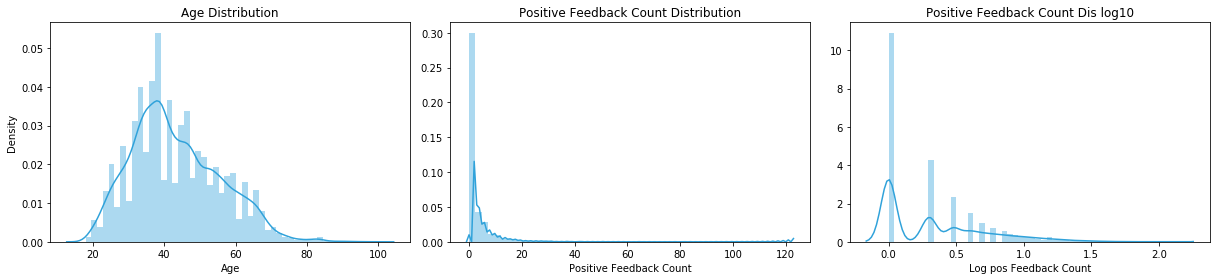

In [13]:
fig,ax = plt.subplots(1,3,figsize = (17,4),sharey = False)
sns.distplot(df['Age'],ax = ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'],ax = ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10(df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1),ax = ax[2])
ax[2].set_title('Positive Feedback Count Dis log10')
ax[2].set_xlabel('Log pos Feedback Count')
plt.tight_layout()
plt.show()


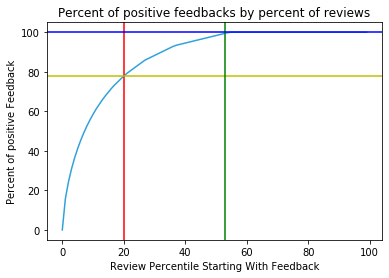

77.86472326706073 % of positive feedbacks are given to top 20% reviews
The Gini Coefficient is 0.7578513611074884


In [14]:
def percentage_accumulation(series,percentage):
    return ((series.sort_values(ascending = False)[:round(len(series) * percentage/100)].sum()/series.sum()) * 100)
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height,area = 0,0
    for value in sorted_list:
        height += value
        area += height - value / 2
    fair_area = height * len(list_of_values) / 2
    return (fair_area - area) / fair_area
inequality = []
for val in list(range(100)):
    inequality.append(percentage_accumulation(df['Positive Feedback Count'],val))    
plt.plot(inequality)
plt.title('Percent of positive feedbacks by percent of reviews')
plt.xlabel('Review Percentile Starting With Feedback')
plt.ylabel('Percent of positive Feedback')
plt.axvline(x = 20,c = 'r')
plt.axhline(y = 78,c = 'y')
plt.axvline(x = 53,c = 'g')
plt.axhline(y = 100,c = 'b')
plt.show()

print('{} % of positive feedbacks are given to top 20% reviews'.format(percentage_accumulation(df['Positive Feedback Count'],20)))
print('The Gini Coefficient is {}'.format(gini(df['Positive Feedback Count'])))

46.730644813456976 % of positive feedbacks are given to top 20% reviews
The Gini Coefficient is 0.38035924227983886


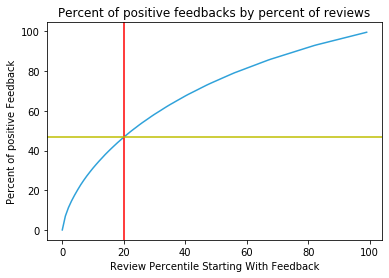

In [15]:
# now lets look at top 20% of the top 20%
top_20 = df['Positive Feedback Count'].sort_values(ascending = False)[:round(df.shape[0] * 20/100)]
inequality = []
for val in list(range(100)):
    inequality.append(percentage_accumulation(top_20,val))
plt.plot(inequality)
plt.title('Percent of positive feedbacks by percent of reviews')
plt.xlabel('Review Percentile Starting With Feedback')
plt.ylabel('Percent of positive Feedback')
plt.axvline(x = 20,c = 'r')
plt.axhline(y = 47,c = 'y')
print('{} % of positive feedbacks are given to top 20% reviews'.format(percentage_accumulation(top_20,20)))
print('The Gini Coefficient is {}'.format(gini(top_20)))

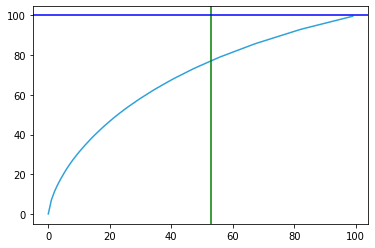

77.86472326706073 % of positive feedbacks are given to top 20% reviews
The Gini Coefficient is 0.7578513611074884


In [16]:
plt.plot(inequality)

plt.axvline(x = 53,c = 'g')
plt.axhline(y = 100,c = 'b')
plt.show()

print('{} % of positive feedbacks are given to top 20% reviews'.format(percentage_accumulation(df['Positive Feedback Count'],20)))
print('The Gini Coefficient is {}'.format(gini(df['Positive Feedback Count'])))

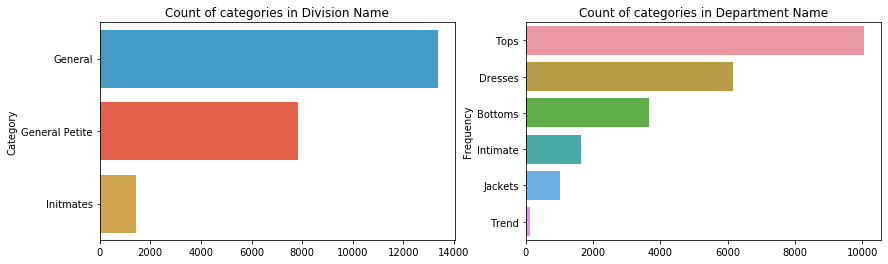

In [17]:
row_plots = ['Division Name','Department Name']
fig,ax = plt.subplots(1,len(row_plots),figsize = (14,4),sharex = False)
for i,x in enumerate(row_plots):
    sns.countplot(y = x,data = df,order = df[x].value_counts().index,ax = ax[i])
    ax[i].set_title('Count of categories in {}'.format(x))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')
ax[0].set_ylabel('Category')
plt.show()
# enumerating through the loop enables the loop iteration to coninside with the matplotlib subplot axis


Data Frame Dimension 22628


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0
Character Count,310.8604,144.836158,16.0,189.0,305.0,469.0,504.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0


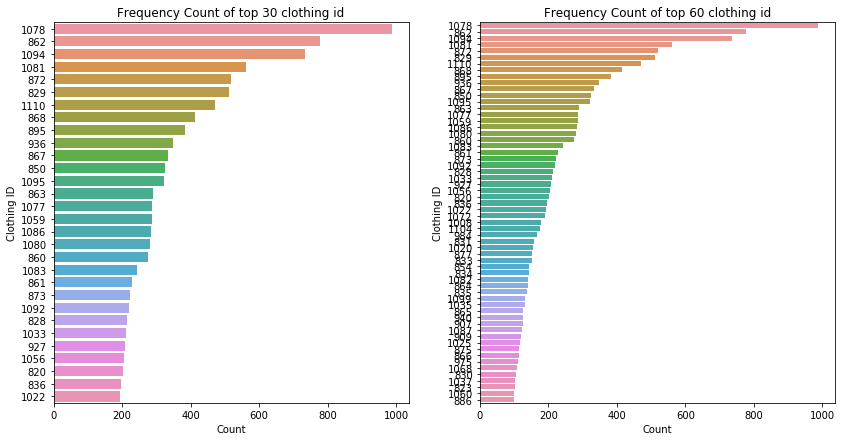

In [18]:
fig,ax = plt.subplots(1,2,figsize = (14,7))
num = 30
sns.countplot(y = 'Clothing ID',data = df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],ax = ax[0],order = df['Clothing ID'].value_counts()[:num].index)
ax[0].set_title('Frequency Count of top 30 clothing id')
ax[0].set_xlabel('Count')
num = 60
sns.countplot(y = 'Clothing ID',data = df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],ax = ax[1],order = df['Clothing ID'].value_counts()[:num].index)
ax[1].set_title('Frequency Count of top 60 clothing id')
ax[1].set_xlabel('Count')
print('Data Frame Dimension {}'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078,862,1094])].describe().T.drop(columns = 'count')

In [19]:
df[df['Clothing ID'].isin([1078,862,1094])][['Title','Division Name','Department Name','Class Name']].describe().T.drop(columns = 'count')

,unique,top,freq
Title,1815,Beautiful dress,21
Division Name,2,General,1524
Department Name,2,Dresses,1722
Class Name,2,Dresses,1722


In [20]:
# from the above diagram we observe that around three products recive a small magnitude of more reviews than others 
# by looking at descriptive stastics of this items we observe that this items recived an average rating of 4.2 and average
# recommendation rate of 0.81 furthermore we can analyze that this dresses are normal dersses
# this observations shed some light on nature of review popularity and rating performance aa quenstion that tells us about customer's 
#motivation to leave review

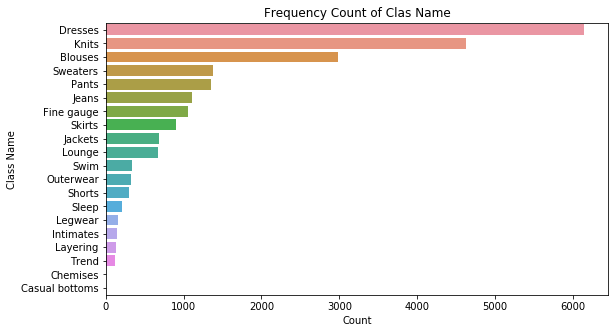

In [21]:
plt.subplots(figsize = (9,5))
sns.countplot(data = df,y = 'Class Name',order = df['Class Name'].value_counts().index)
plt.title('Frequency Count of Clas Name')
plt.xlabel('Count')
plt.show()

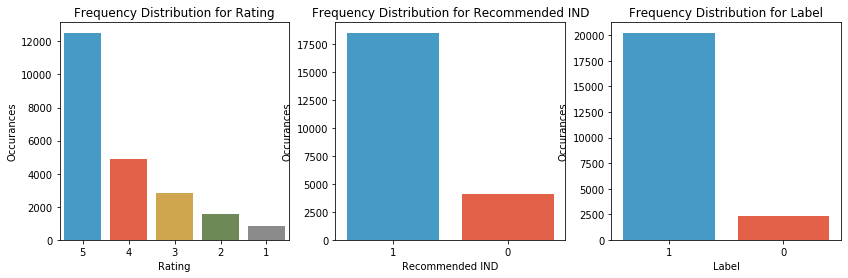

In [22]:
cat_types = ['Rating','Recommended IND','Label']
increment = 0
fig,ax = plt.subplots(1,len(cat_types),figsize = (14,4),sharex = False)
increment = 0
for i in range(len(cat_types)):
    sns.countplot(x = cat_types[increment],data = df,order = df[cat_types[increment]].value_counts().index,ax = ax[i])
    ax[i].set_title('Frequency Distribution for {}'.format(cat_types[increment]))
    ax[i].set_ylabel('Occurances')
    ax[i].set_xlabel('{}'.format(cat_types[increment]))
    increment += 1
    

for ratings
the vast majority of reviews were highly positive with a score of five out of five this 
suggests that this retail store is doing farely well
but we need to keep in mind that this reviews are subjective and some negative reviews may be a outcome of a bad day instead
of constructive feed backs

Correlation coefficient of Word Count and Character Count: 0.99
Total Word Count is 1362476
Total Character Count is 6986656


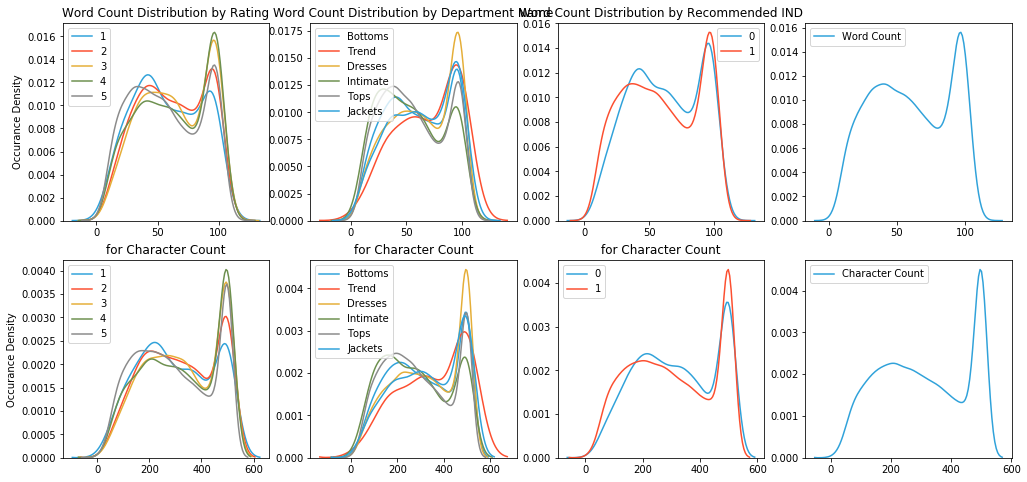

In [23]:
fig,ax = plt.subplots(2,4,figsize = (17,8),sharex = False)
for ii,xvar in enumerate(['Word Count','Character Count']):
    for i,y in enumerate(['Rating','Department Name','Recommended IND']):
        for x in set(df[y][df[y].notnull()]):
            sns.kdeplot(df[xvar][df[y] == x],label = x,shade = False,ax = ax[ii,i])
        if ii is 0:
            ax[ii,i].set_title('{} Distribution by {}'.format(xvar,y))
        else:
            ax[ii,i].set_title('for {}'.format(xvar))
    ax[ii,0].set_ylabel('Occurance Density')
    ax[ii,0].set_xlabel('')
    sns.kdeplot(df[xvar],ax = ax[ii,3])
print('Correlation coefficient of Word Count and Character Count: {}'.format(round((df['Word Count'].corr(df['Character Count'])),2)))
print('Total Word Count is {}'.format(df['Word Count'].sum()))
print('Total Character Count is {}'.format(df['Character Count'].sum()))

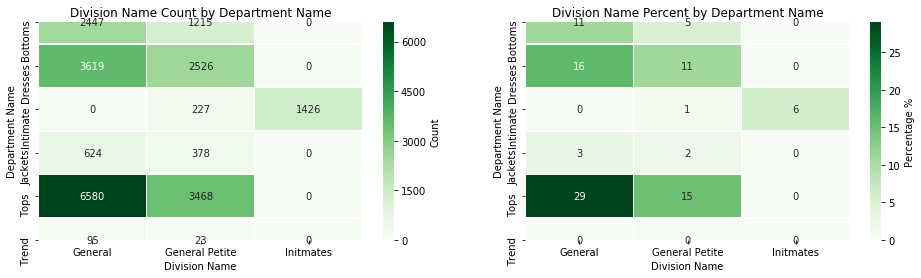

In [24]:
fig,ax = plt.subplots(1,2,figsize = (16,4))
sns.heatmap(pd.crosstab(df['Department Name'],df['Division Name']),annot = True,linewidth = 0.5,ax = ax[0],fmt = 'g',cmap = 'Greens',cbar_kws = {'label':'Count'})
ax[0].set_title('Division Name Count by Department Name')
sns.heatmap(pd.crosstab(df['Department Name'],df['Division Name'],normalize = True).mul(100).round(0),annot = True,linewidth = 0.5,ax = ax[1],fmt = 'g',cmap = 'Greens',
            cbar_kws = {'label':'Percentage %'})
ax[1].set_title('Division Name Percent by Department Name')
plt.show()

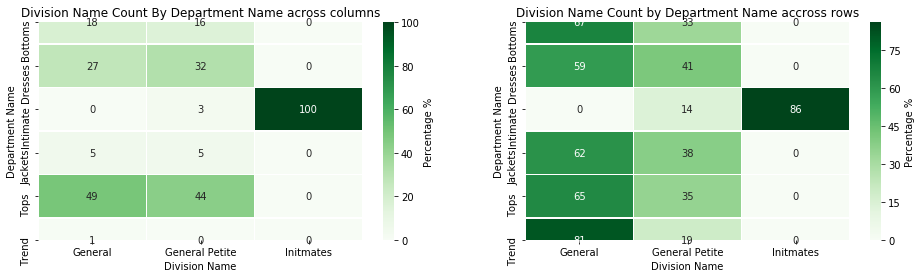

In [25]:
fig,ax = plt.subplots(1,2,figsize = (16,4))
sns.heatmap(pd.crosstab(df['Department Name'],df['Division Name'],normalize = 'columns').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[0],cmap = 'Greens',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[0].set_title('Division Name Count By Department Name across columns')

sns.heatmap(pd.crosstab(df['Department Name'],df['Division Name'],normalize = 'index').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[1],cmap = 'Greens',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[1].set_title('Division Name Count by Department Name accross rows')
plt.show()

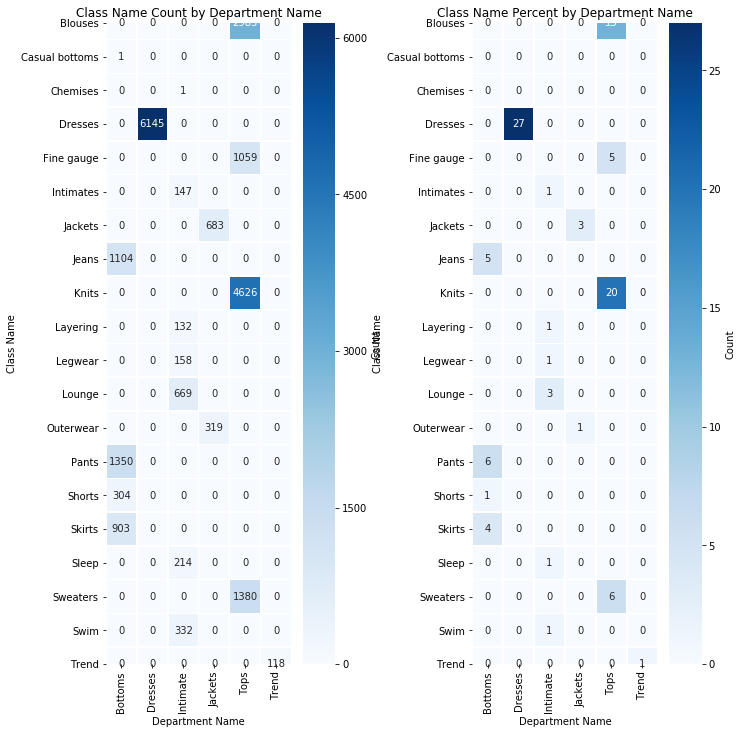

In [26]:
fig,ax = plt.subplots(1,2,figsize = (10,10))
sns.heatmap(pd.crosstab(df['Class Name'],df['Department Name']),annot = True,linewidth = 0.5,ax = ax[0],fmt = 'g',cmap = 'Blues',
           cbar_kws = {'label':'Count'}
           )
ax[0].set_title('Class Name Count by Department Name')

sns.heatmap(pd.crosstab(df['Class Name'],df['Department Name'],normalize = True).mul(100).round(0),annot = True,linewidth = 0.5,ax = ax[1],fmt = 'g',cmap = 'Blues',
           cbar_kws = {'label':'Count'}
           )
ax[1].set_title('Class Name Percent by Department Name')

plt.tight_layout(pad = 0)

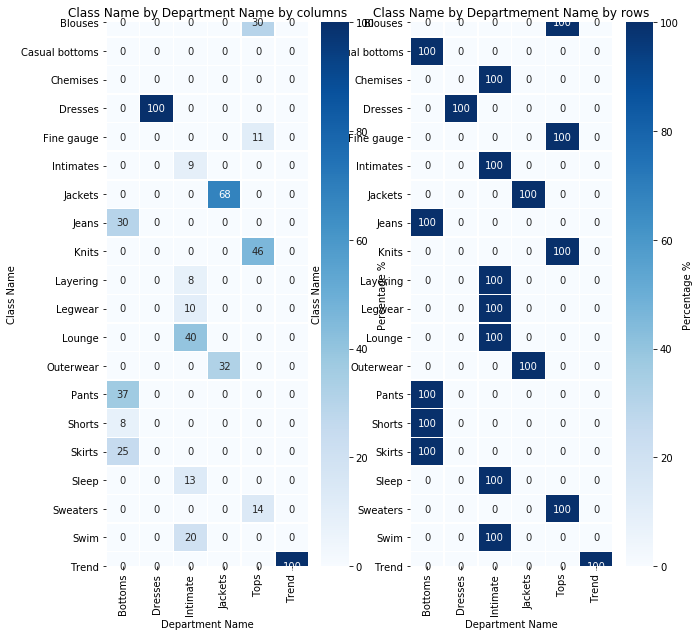

<Figure size 432x288 with 0 Axes>

In [27]:
fig,ax = plt.subplots(1,2,figsize = (10,10))
sns.heatmap(pd.crosstab(df['Class Name'],df['Department Name'],normalize = 'columns').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[0],cmap = 'Blues',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[0].set_title('Class Name by Department Name by columns')

sns.heatmap(pd.crosstab(df['Class Name'],df['Department Name'],normalize = 'index').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[1],cmap = 'Blues',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[1].set_title('Class Name by Departmement Name by rows')
plt.show()
plt.tight_layout(pad = 0)

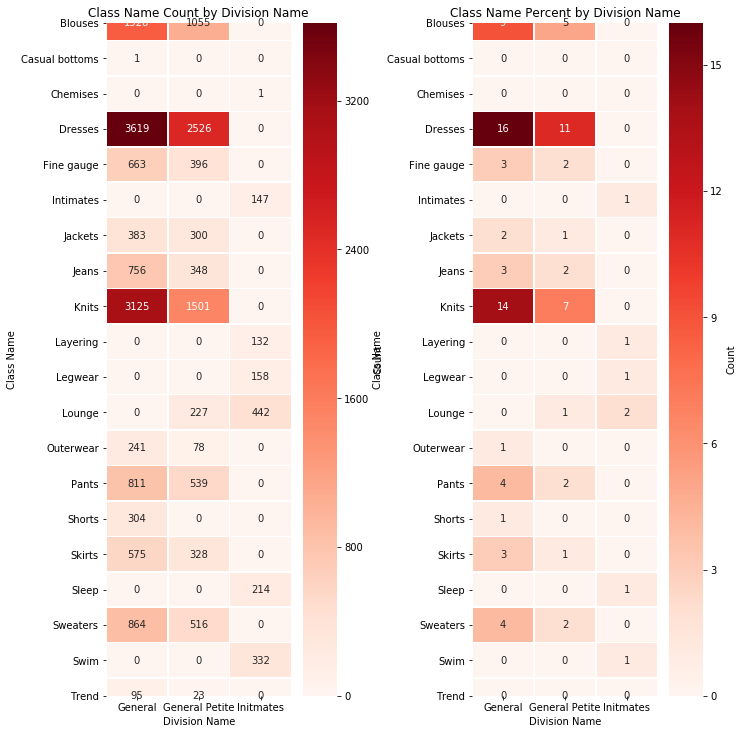

In [28]:
fig,ax = plt.subplots(1,2,figsize = (10,10))
sns.heatmap(pd.crosstab(df['Class Name'],df['Division Name']),annot = True,linewidth = 0.5,ax = ax[0],fmt = 'g',cmap = 'Reds',
           cbar_kws = {'label':'Count'}
           )
ax[0].set_title('Class Name Count by Division Name')

sns.heatmap(pd.crosstab(df['Class Name'],df['Division Name'],normalize = True).mul(100).round(0),annot = True,linewidth = 0.5,ax = ax[1],fmt = 'g',cmap = 'Reds',
           cbar_kws = {'label':'Count'}
           )
ax[1].set_title('Class Name Percent by Division Name')

plt.tight_layout(pad = 0)

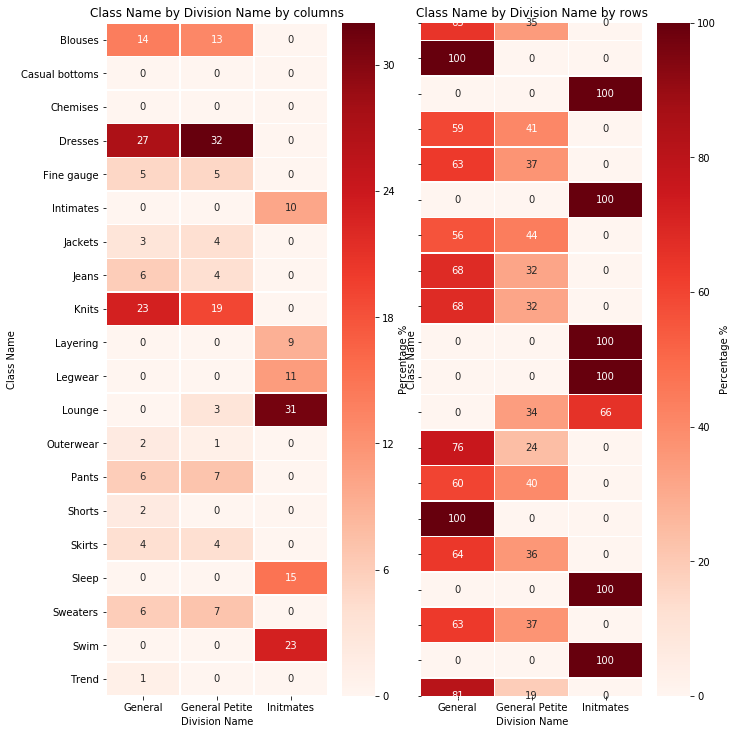

In [29]:
fig,ax = plt.subplots(1,2,figsize = (10,10),sharey = True)
sns.heatmap(pd.crosstab(df['Class Name'],df['Division Name'],normalize = 'columns').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[0],cmap = 'Reds',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[0].set_title('Class Name by Division Name by columns')

sns.heatmap(pd.crosstab(df['Class Name'],df['Division Name'],normalize = 'index').mul(100).round(0),linewidth = 0.5,annot = True,ax = ax[1],cmap = 'Reds',fmt = 'g',
           cbar_kws = {'label':'Percentage %'}
           )
ax[1].set_title('Class Name by Division Name by rows')
plt.tight_layout(pad = 0)
plt.show()

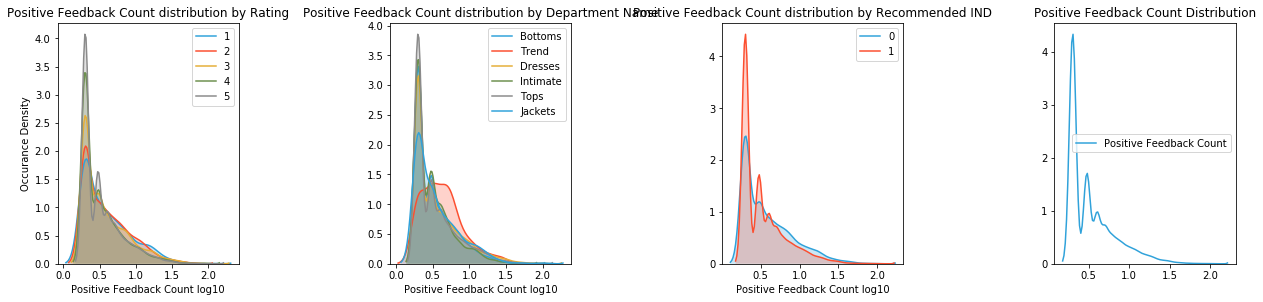

In [30]:
fig,ax = plt.subplots(1,4,figsize = (17,4))
xvar = 'Positive Feedback Count'
plotdf = np.log10(df[xvar] + 2)
for i,y in enumerate(['Rating','Department Name','Recommended IND']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y] == x],label = x,ax = ax[i],shade = True)
    ax[i].set_xlabel('{} log10'.format(xvar))
    ax[i].set_title('{} distribution by {}'.format(xvar,y))
ax[0].set_ylabel('Occurance Density')
sns.kdeplot(plotdf,ax = ax[3])
ax[3].set_title('{} Distribution'.format(xvar))
plt.tight_layout(pad = 0)
plt.show()

In [31]:
for rec in [0,1]:
    temp = df['Positive Feedback Count'][df['Recommended IND'] == rec]
    print('Recommended is {}'.format(rec))
    print('{}% of Positive Feedback belongs to the top 20% of reviews with Recommended is {}'.format(round(percentage_accumulation(temp,20)),rec))
    
    print('Gini Coefficient :{}'.format(round(gini(temp),2)))

Recommended is 0
75.0% of Positive Feedback belongs to the top 20% of reviews with Recommended is 0
Gini Coefficient :0.73
Recommended is 1
78.0% of Positive Feedback belongs to the top 20% of reviews with Recommended is 1
Gini Coefficient :0.76


In [32]:
for rec in [0,1]:
    temp = df['Positive Feedback Count'][df['Recommended IND'] == rec]
    print('Recommended is {}'.format(rec))
    print('{}% of positive Feedback belongs to top 20% of reviews where recommended is {}'.format(round(percentage_accumulation(temp,20)),rec))
    print('Gini Coefficient is {}'.format(round(gini(temp),2)))

Recommended is 0
75.0% of positive Feedback belongs to top 20% of reviews where recommended is 0
Gini Coefficient is 0.73
Recommended is 1
78.0% of positive Feedback belongs to top 20% of reviews where recommended is 1
Gini Coefficient is 0.76


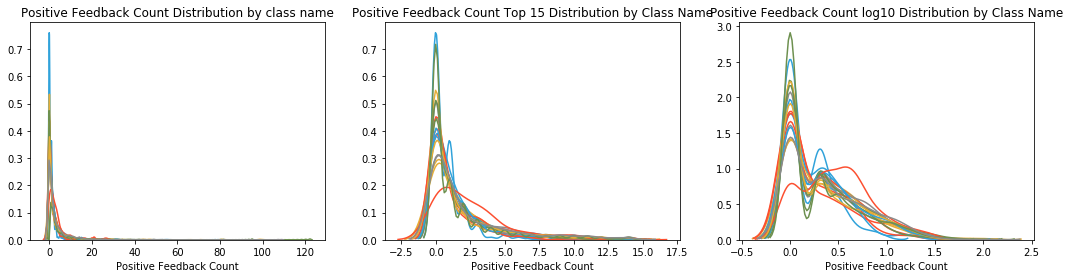

In [33]:
fig,ax = plt.subplots(1,3,figsize = (18,4))
xvar = 'Positive Feedback Count'
for x in set(df['Class Name'][df['Class Name'].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df['Class Name'] == x],ax = ax[0])
ax[0].legend_.remove()
ax[0].set_xlabel('{}'.format(xvar))
ax[0].set_title('{} Distribution by {}'.format(xvar,'class name'))

min_value = 15
for x in set(df['Class Name'][df['Class Name'].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df['Class Name'] == x) & (df['Positive Feedback Count'] < min_value)],ax = ax[1])
ax[1].legend_.remove()
ax[1].set_xlabel('{}'.format(xvar))
ax[1].set_title('{} Top 15 Distribution by {}'.format(xvar,'Class Name'))

for x in set(df['Class Name'][df['Class Name'].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count'] + 1)[df['Class Name'] == x],ax = ax[2])
ax[2].legend_.remove()
ax[2].set_xlabel('{}'.format(xvar))
ax[2].set_title('{} log10 Distribution by {}'.format(xvar,'Class Name'))
plt.show()

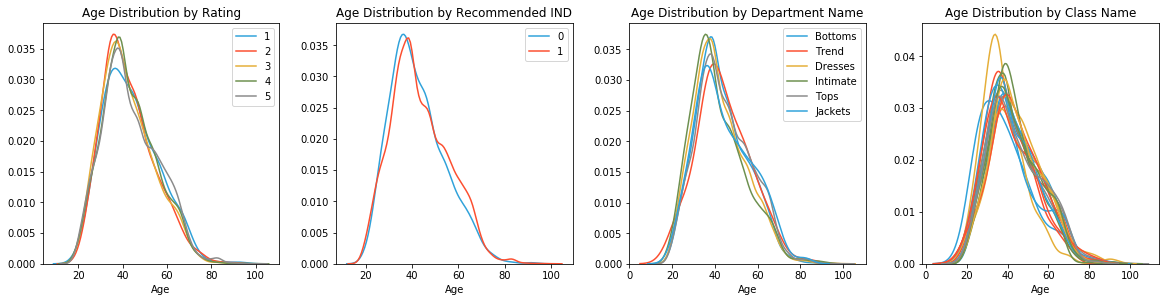

In [34]:
fig,ax = plt.subplots(1,4,figsize = (16,4))
xvar = 'Age'
plotdf = df['Age']
for i,y in enumerate(['Rating','Recommended IND','Department Name']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y] == x],ax = ax[i],label = x)
    ax[i].set_xlabel("{}".format(xvar))
    ax[i].set_label('Occurance Density')
    ax[i].set_title('{} Distribution by {}'.format(xvar,y))

for x in set(df['Class Name'][df['Class Name'].notnull()]):
    sns.kdeplot(plotdf[df['Class Name'] == x],ax = ax[3])
ax[3].legend_.remove()
ax[3].set_xlabel('{}'.format(xvar))
ax[3].set_label('Occurance Density')
ax[3].set_title('{} Distribution by {}'.format(xvar,'Class Name'))
plt.tight_layout(pad = 0)
plt.show()

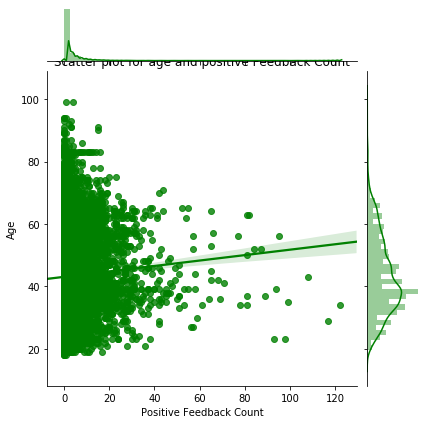

In [35]:
def minmaxscaler(df):
    return (df - df.min()) / (df.max() - df.min())
def zscorenormalize(df):
    return (df - df.mean())/ (df.std())
g = sns.jointplot(x = df['Positive Feedback Count'],y = df['Age'],kind = 'reg',color = 'green')
plt.title('Scatter plot for age and positive Feedback Count')
plt.show()
# the distribution plot uptop clearly shows that most points reside at zero


Groupby([x])[hue]:Groups the data by the x variable what will become the x axis of the bar plot
value_counts(normalized = True):Then the hue variable which is rowed by the x variable is ordered by most frequent to the least


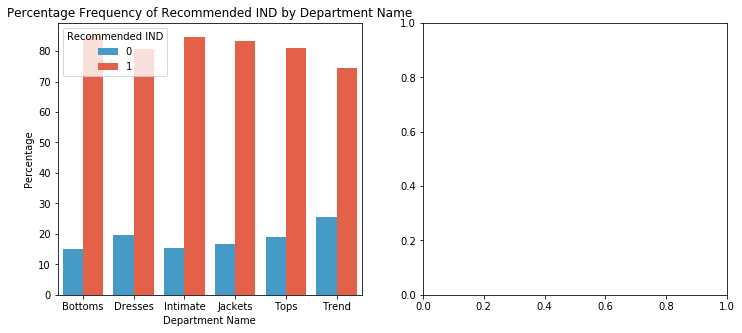

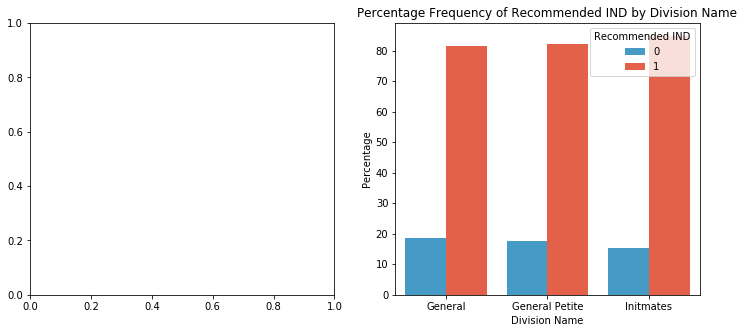

In [36]:
# recommended IND by Department and Division
fig,ax = plt.subplots(1,2,figsize = (12,5))
huevar = 'Recommended IND'
x = 'Department Name'
y = 'Percentage'
hue = huevar
data = df
data = (data[[x,hue]]
    .reset_index(drop = True)
    .groupby(x)[hue].value_counts(normalize = True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
    .sort_values(by = hue)
)
sns.barplot(data = data,x = x,y = y,hue = hue,ax = ax[0])
ax[0].set_title('Percentage Frequency of {} by {}'.format(hue,x))
plt.show()
fig,ax = plt.subplots(1,2,figsize = (12,5))
huevar = 'Recommended IND'
x = 'Division Name'
y = 'Percentage'
hue = huevar
data = df
data = (data[[x,hue]]
    .reset_index(drop = True)
    .groupby(x)[hue].value_counts(normalize = True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
    .sort_values(by = hue)
)
sns.barplot(data = data,x = x,y = y,hue = hue,ax = ax[1])
ax[1].set_title('Percentage Frequency of {} by {}'.format(hue,x))
plt.show()

In [49]:
def percentstandardize_barplot(x,y,hue,data,ax = None,order = None):
    sns.barplot(x = x,y = y,hue = hue,ax = ax,order = order,
    data = (data[[x,hue]]
            .reset_index(drop = True)
            .groupby([x])[hue]
            .value_counts(normalize = True)
            .rename('Percentage')
            .mul(100)
            .reset_index()
            .sort_values(hue)
    ))
    
    plt.ylabel('Percentage')

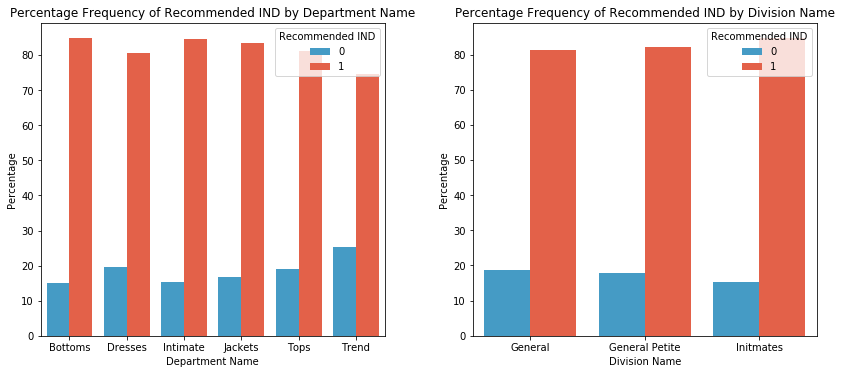

In [38]:
huevar = 'Recommended IND'
fig,ax = plt.subplots(1,2,figsize = (12,5))
percentstandardize_barplot(x = 'Department Name',y = 'Percentage',hue = huevar,data = df,ax = ax[0])
ax[0].set_title('Percentage Frequency of {} by Department Name'.format(huevar))
percentstandardize_barplot(x = 'Division Name',y = 'Percentage',hue = huevar,data = df,ax = ax[1])
ax[1].set_title('Percentage Frequency of {} by Division Name'.format(huevar))
plt.tight_layout(pad = 0)
plt.show()

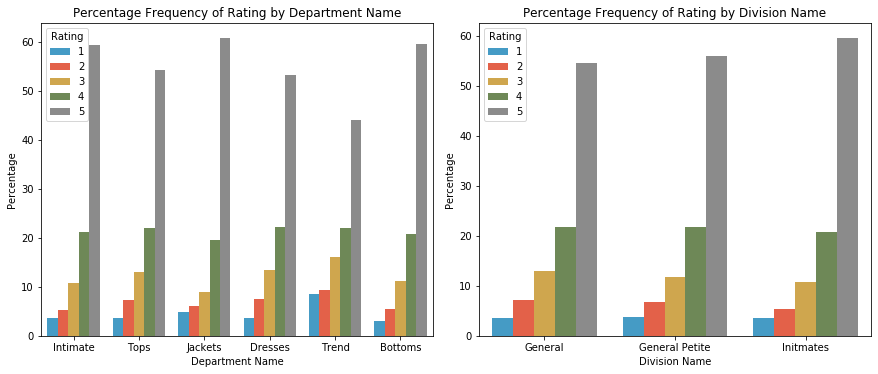

In [39]:
huevar = 'Rating'
fig,ax = plt.subplots(1,2,figsize = (12,5))
percentstandardize_barplot(x = 'Department Name',y = 'Percentage',hue = huevar,data = df,ax = ax[0])
ax[0].set_title('Percentage Frequency of {} by Department Name'.format(huevar))
percentstandardize_barplot(x = 'Division Name',y = 'Percentage',hue = huevar,data = df,ax = ax[1])
ax[1].set_title('Percentage Frequency of {} by Division Name'.format(huevar))
plt.tight_layout(pad = 0)
plt.show()

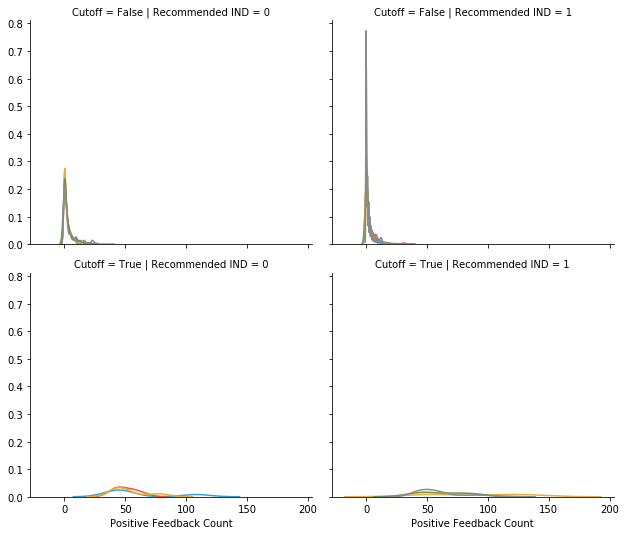

In [40]:
df['Cutoff'] = df['Positive Feedback Count'] >= 40
g = sns.FacetGrid(df,row = 'Cutoff',col = 'Recommended IND',hue = 'Rating',size = 4,aspect = 1.1)
g.map(sns.distplot,'Positive Feedback Count',hist = False)
plt.subplots_adjust(top=0.90)

In [ ]:
def percentstandardize_barplot(x,y,hue,data,ax = None,order = None):
    sns.barplot(x = x,y = y,hue = hue,ax = ax,order = order,
    data = (data[[x,hue]]
            .reset_index(drop = True)
            .groupby([x])[hue]
            .value_counts(normalize = True)
            .rename('Percentage')
            .mul(100)
            .reset_index()
            .sort_values(hue)
    ))
    
    plt.ylabel('Percentage')

In [ ]:
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=df, ax=axes[0])
axes[0].set_title("Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

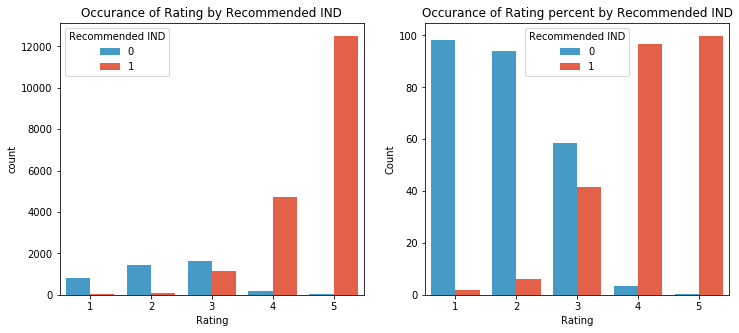

In [52]:
huecar = 'Rating'
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'Rating',data = df,hue = 'Recommended IND',ax = ax[0])
ax[0].set_title('Occurance of {} by {}'.format(huevar,'Recommended IND'))
ax[0].set_ylabel('count')
percentstandardize_barplot(x = 'Rating',y = 'Percentage',hue = 'Recommended IND',data = df,ax = ax[1])
ax[1].set_title('Occurance of {} percent by {}'.format(huevar,'Recommended IND'))
ax[1].set_ylabel('Count')
plt.show()

his is a big one, which returns to my question: "How do customers express their dislike for a Product". There is a conflicting interest between the customers personal interaction with the product, such as the personal size fit, experience, and other personal synergies, and what the customer would invision for other customers.

My theory is that when customers give product a low rating, but nevertheless recommend the item, the customer is protesting about a personal complaint they have, such as a fit issue or customer service and product handling problem all the while still expressing admiration for the product, an approval of style worthy for the body of another.

Looking at the data, it appears like five star ratings are void of non-recommendations, but low rated products are recommended a small amount of the time.

The more even occurrence between recommended and non-recommended on products with three rating is a phenomenon worth getting to the bottom of. Especially the recommended portion of the reviews, which might shed light on the biggest limitations of the retailers personal servicing, and the customers personal clothing experience.

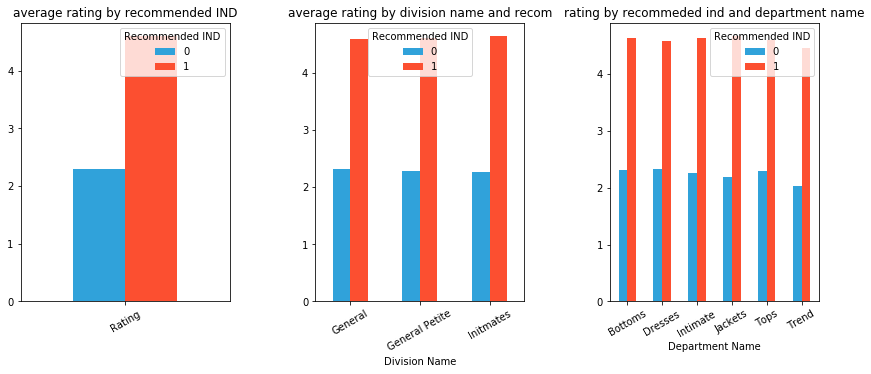

In [77]:
fig,ax = plt.subplots(1,3,figsize = (12,5))
rot = 30
df.pivot_table('Rating',columns = ['Recommended IND']).plot(kind = 'bar',ax = ax[0],rot = rot)
ax[0].set_title('average rating by recommended IND')
df.pivot_table('Rating',index = 'Division Name',columns = ['Recommended IND']).plot(kind = 'bar',ax = ax[1],rot = rot)
ax[1].set_title('average rating by division name and recom')
df.pivot_table('Rating',index = 'Department Name',columns = ['Recommended IND']).plot(kind = 'bar',ax = ax[2],rot = rot)
ax[2].set_title('rating by recommeded ind and department name')
plt.tight_layout(pad = 0)
plt.show()

Correlating Average Rating and Recommended IND by Clothing ID
analysis of data grouped by clothing ID
we stress on the fact that we have grouped by clothing id in this case  this aggregation investigates if there is trend between average rating and number of reviews by product
this tells us a relation between count for a particular product id and mean of rating for that particular product

from the correlation map we get a clear interpretation that there is in fact no correlation between cout nd average values this overall suggests that popularity of the item the item is popular because there are more ratings for that item popularity of the item doesnot lead to differintial treatment when it comes to average scoring 

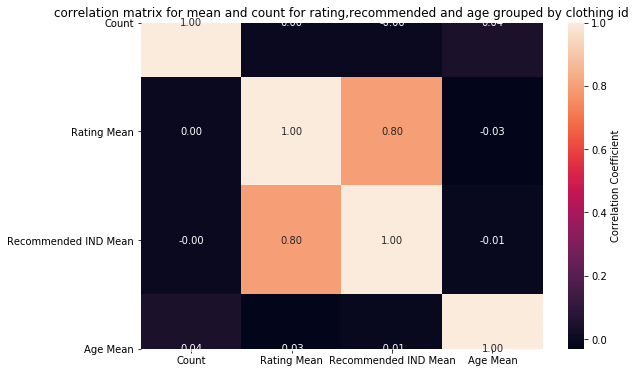

In [107]:
temp = (df.groupby('Clothing ID')[['Rating','Recommended IND','Age']].aggregate(['count','mean']))
temp.columns = ['Count','Rating Mean','Recommended IND Count','Recommended IND Mean','Age Count','Age Mean']
temp.drop(columns = ['Recommended IND Count','Age Count'],inplace = True)
fig,ax = plt.subplots(figsize = (9,6))
ax = sns.heatmap(temp.corr(),annot = True,fmt = '.2f',cbar_kws = {'label':'Correlation Coefficient'})
ax.set_title('correlation matrix for mean and count for rating,recommended and age grouped by clothing id')
plt.show()

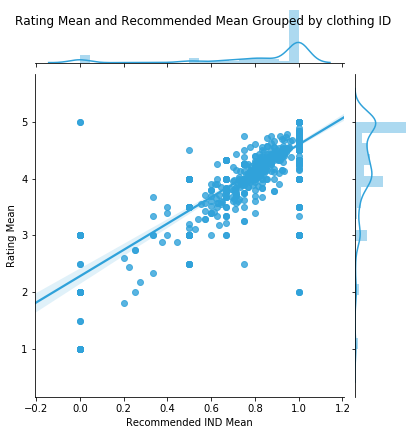

In [200]:
# there is a correlation between recommended meab and rating mean
g = sns.jointplot(data = temp,x = 'Recommended IND Mean',y = 'Rating Mean',kind = 'reg')
plt.subplots_adjust(top = 0.999)
g.fig.suptitle('Rating Mean and Recommended Mean Grouped by clothing ID')
plt.show()

okes aside, perhaps the dots are the bottom left could be the products that unarguably need attention from the retailer, in the hope of preserving brand image.
looking at the scatter plot we understand that the products situated at the bottom left of the graphs are un arguably lest performing and the prealtor shouls look at them in hope to preservat the barnd image

,Count,Rating Mean,Recommended IND Mean,Age Mean
count,131.000000,131.000000,131.000000,131.000000
mean,2.167939,2.422484,0.113988,41.637813
std,3.068833,0.739727,0.197894,11.438177
min,1.000000,1.000000,0.000000,21.000000
25%,1.000000,2.000000,0.000000,34.250000
50%,1.000000,3.000000,0.000000,40.600000
75%,2.000000,3.000000,0.211111,46.750000
max,24.000000,3.291667,0.541667,74.000000


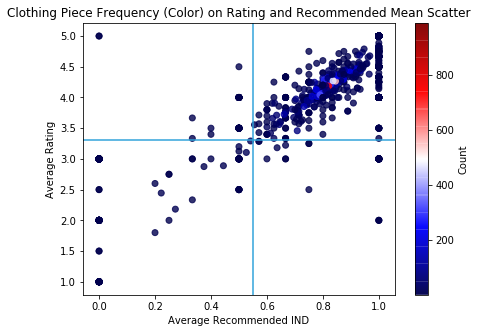

In [201]:
plt.figure(figsize = (7,5))
plt.scatter(temp['Recommended IND Mean'],temp['Rating Mean'],alpha = 0.8,c = temp['Count'],cmap = 'seismic')
cbar = plt.colorbar()

cbar.set_label('Count',rotation = 90)
plt.xlabel('Average Recommended IND')
plt.ylabel('Average Rating')
plt.title('Clothing Piece Frequency (Color) on Rating and Recommended Mean Scatter')
l = plt.axhline(y = 3.3)
l = plt.axvline(x = 0.55)

temp[(temp['Rating Mean'] < 3.3) & (temp['Recommended IND Mean'] <=0.55)].describe()

Follow-up on the previous correlation plot. This plot displays that these outliers are not very strongly represented. Indeed, the average count for the LOW QUADRANT, as labeled at the bottom left of the plot, is only 2.3. For these reasons, hyper negative reviews may be unrepresentative outliers, and not taken as the public's general opinion.

A practise I could envision tackling this problem is to include the average rating of the product class, such as "Dress", in order to relieve customers who may be worried about product with low, hyper negative reviews.

This Plot is an followup plot for the previous plot when we observe the plot carefully we observe that the average count of this items is very less or speaking in other words these outliers are not strongly represented Indeeed the average count for the low qudrent as labeled atthe bottom left of the plot is only 2.3 for these reasins hypernegative reviews may be unrepresentative outliers and not taken as publics genral opinion



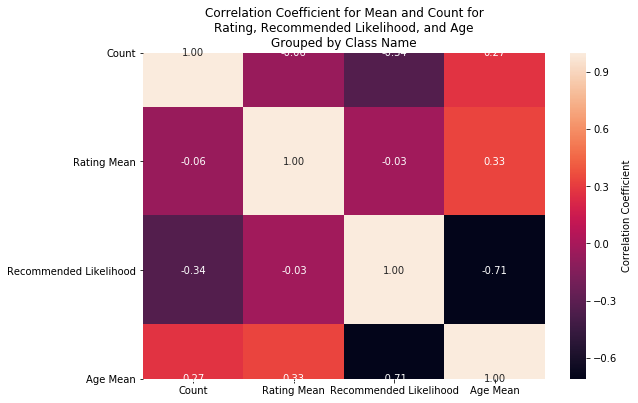

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [202]:
key = "Class Name"
temp = (df.groupby(key)[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended Likelihood Count",
                "Recommended Likelihood","Age Count","Age Mean"]
temp.drop(["Recommended Likelihood Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}".format(key))
plt.show()
print("Class Categories:\n",df["Class Name"].unique())

# Correlating Average Rating and Recommeded IND by Class Name

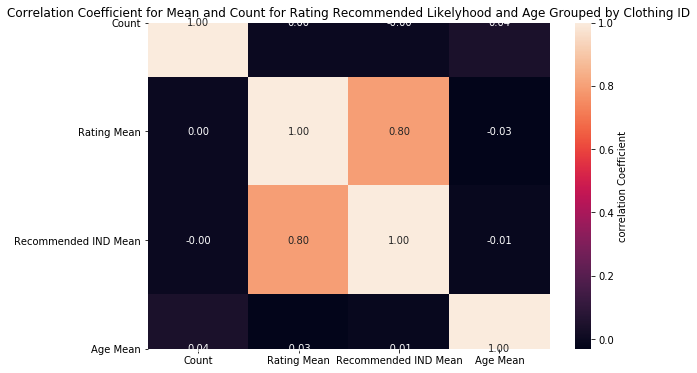

In [203]:
key = 'Clothing ID'
temp = (df.groupby(key)['Rating','Recommended IND','Age']).aggregate(['count','mean'])
temp.columns = ['Count','Rating Mean','Recommended IND Count','Recommended IND Mean','Age Count','Age Mean']
temp.drop(columns = ['Recommended IND Count','Age Count'],inplace = True)
fig,ax = plt.subplots(figsize = (9,6))
ax = sns.heatmap(temp.corr(),annot = True,fmt = '.2f',cbar_kws = {'label':'correlation Coefficient'})
ax.set_title('Correlation Coefficient for Mean and Count for Rating Recommended Likelyhood and Age Grouped by {}'.format(key))
plt.show()
# when we look at the correlation plot we observe that we see a conclisive relationship between the features Recommended IND MEan andd rating Mean

For the various Class cateogries there a notable correlation between average age and recommendation likelihood. I shall investigate

In [204]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
20976,Love the top and the message!,"Love this tank!! the cotton is very soft which also allows some flow. i've worn this to yoga, and to teach barre and cardio dance and it's a hit! as a life-long dancer, this was a must have. my only negative is since the sizing is either xs/s or m/l, it may run too big or too small for some. i tyically wear a m or 6 in retailer tops and this is a little large in m/l; however, not to the point of being distracted with straps falling or the like. highly recommend.",5
7496,Chambray vest,"Love this vest! saw it and bought it instantly. i'm 5'8"" and slim and got the xs. it fits perfectly. there is a lot of ""puff"" to it, but it's really warm and soft.",5
9503,Pretty but not for me,Very pretty dress. the color is much brighter in person - a little too bubblegum pink for me. i love the way the bodice fit but there was just too much material in the skirt which made me look hippier than i am. would have preferred the skirt to have more of an a-line cut,3
20024,NaN,"This caught my eye, purely by accident as i was in the dressing room. immediately attracted to the pattern, the color, the quality and the shape of the skirt. lo and behold, it turned out to be maeve, one of my favorite designers at retailer. this skirt does not disappoint at all. i normally try to wait for sales to make a purchase, but this is well worth the full retail price. the skirt is very well made. the material is structured but not stiff. i also don't normally like high waisted ski",5
19462,NaN,"I bought this dress for my college graduation, and it's truly gorgeous! i love the loose, breezy fit, but it did feel just a little bit sack-like on me, definitely more-so than i expected from looking at the product picture, even after sizing down to a small (which was comfortable, and i'm usually a medium). i ended up pairing it with a small belt. \r\n\r\nreally pretty dress, just be advised - leaves a *lot* of room around the waist!",5
17569,Bought 2 pairs,When these cords went on sale i bought a 2nd pair. they are great work week pants (i teach) - comfortable and machine washable. the fit is relaxed-trouser,5
16524,Fuzzy,Wonderful sweater and fashionable for autumn. the only thing i do not like about the sweater is that it sheds very bad. bring a lint roller with you when you wear the sweater!,4


In [205]:
pd.set_option('max_colwidth',500)
df[['Title','Review Text','Rating']].sample(7)

,Title,Review Text,Rating
23172,Great!!!!,"I purchased this dress in the raspberry for my best friend's bridal shower and it was such a hit! i got it for the $60 sale price with the additional 40% off sale items that retailer loves so much- it came to $41! i paired it with a chunky gold necklace and it was adorable! so many compliments! i'm typically a medium through and through and this fit me true to size as well. 5'6"", between 135-140lbs. the cut of the dress fit me perfectly and the material is amazing. i'd definitely purchase this!",5
14574,Beautiful swing top,"I'm glad i tried this on. i was drawn to the burgundy and pink floral print, but i wasn't so sure about the cut or style of the top. once it was on, however, i loved it. i don't much care for the a-line tops that remind me of maternity wear. they're cute on rail-thin, young girls, but not so much on mom-bod women in their 40s. this top is the exception. the details from the buttons to the thin pleats, the unique cut of the bust-line and the print make this top both lovely and flattering. i wore",5
2283,Too loose and swingy,"Was not flattering on my body - i have a fuller figure, and this just made me look like i was pregnant.",3
1266,Can't get enough,"This is my favorite dress i have ever purchased. as a 6' tall woman, it's hard to find flattering dresses that are long enough for my legs. this dress is classic, comfortable, and truly flattering. i love the blush color and did not have the issues that other people listed for the color being see-through. i can't get enough of this style...i'll be buying it in black too...ooopss :)",5
9667,Comfy lounging top,"I was looking for a flannel-y buttondown that i could wear with leggings or skinny jeans, and this definitely fits the bill. i like the cute details like the contrast collar and cuffs, and also the slight back pleat and the curved hemline. i'm not crazy about the colorways that are offered, but the pink is cute enough, and as other reviewers mentioned, i find the quality a little lacking. i'd be very happy with this shirt on sale, but not sure about it at full price. i got a size s (5'4"", 12...",4
17509,Love!,"I love this dress. i'm 6' so it's a tad bit shorter than what shows on the model. it stops right at my ankles, which i'm okay with. it's a heavier fabric so it's maybe not good for those really hot, humid days. all-in-all it is super flattering on my hourglass figure. for reference, i'm a 38dd and normally wear a large in dresses at retailer. i ordered the large.",4
9053,Love the details,Great shirt that is basic with a little something extra. meadow rue does it again...i swear i buy everything they put out...,5


In [206]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [217]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
ls = LancasterStemmer()
ps = PorterStemmer()
rt = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
def preprocessing(data):
    txt = data.str.lower().str.cat(sep = ' ')
    words = [w for w in words if not w in stop_words]
    return words

In [218]:
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [225]:
SIA = SentimentIntensityAnalyzer()
df['Review Text'] = df['Review Text'].astype(str)
df['Polrity Score'] = df['Review Text'].apply(lambda x : SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x : SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x : SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x : SIA.polarity_scores(x)['pos'])

In [233]:
df.loc[df['Polrity Score'] > 0,'Sentiment'] = 'Positive'
df.loc[df['Polrity Score'] == 0,'Sentiment'] = 'Neutral'
df.loc[df['Polrity Score'] < 0,'Sentiment'] = 'Negative'

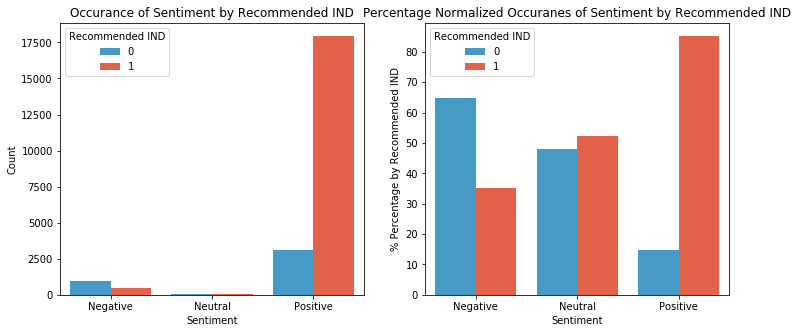

In [250]:
huevar = 'Recommended IND'
xvar = 'Sentiment'
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = xvar,data = df,hue = huevar,order = ['Negative','Neutral','Positive'],ax = ax[0])
ax[0].set_title('Occurance of {} by {}'.format(xvar,huevar))
ax[0].set_ylabel('Count')
percentstandardize_barplot(x= xvar,y = 'Percentage',hue = huevar,data = df,ax = ax[1])
ax[1].set_title('Percentage Normalized Occuranes of {} by {}'.format(xvar,huevar))
ax[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.show()

In [ ]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")
sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")
percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")
percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")
f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()


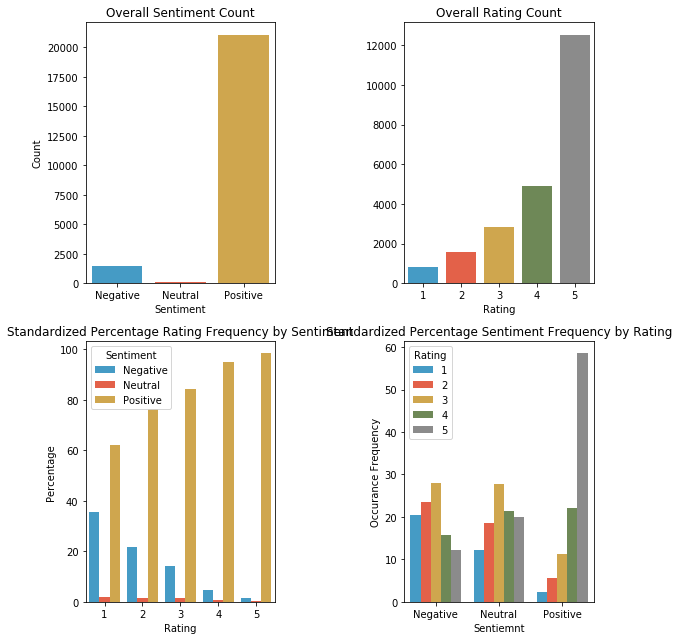

In [266]:
fig,ax = plt.subplots(2,2,figsize = (9,9))
sns.countplot(x = 'Sentiment',data = df,ax = ax[0,0],order = ['Negative','Neutral','Positive'])
ax[0,0].set_xlabel('Sentiment')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Overall Sentiment Count')

sns.countplot(x = 'Rating',data = df,ax = ax[0,1])
ax[0,1].set_xlabel('Rating')
ax[0,1].set_ylabel('')
ax[0,1].set_title('Overall Rating Count')

percentstandardize_barplot(x= 'Rating',y = 'Percentage',hue = 'Sentiment',ax = ax[1,0],data = df)
ax[1,0].set_xlabel('Rating')
ax[1,0].set_ylabel('Percentage')
ax[1,0].set_title('Standardized Percentage Rating Frequency by Sentiment')

percentstandardize_barplot(x = 'Sentiment',y = 'Percentage',hue = 'Rating',ax = ax[1,1],data = df)
ax[1,1].set_ylabel('Occurance Frequency')
ax[1,1].set_title('Standardized Percentage Sentiment Frequency by Rating')
ax[1,1].set_xlabel('Sentiemnt')
plt.tight_layout()

In [ ]:
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()


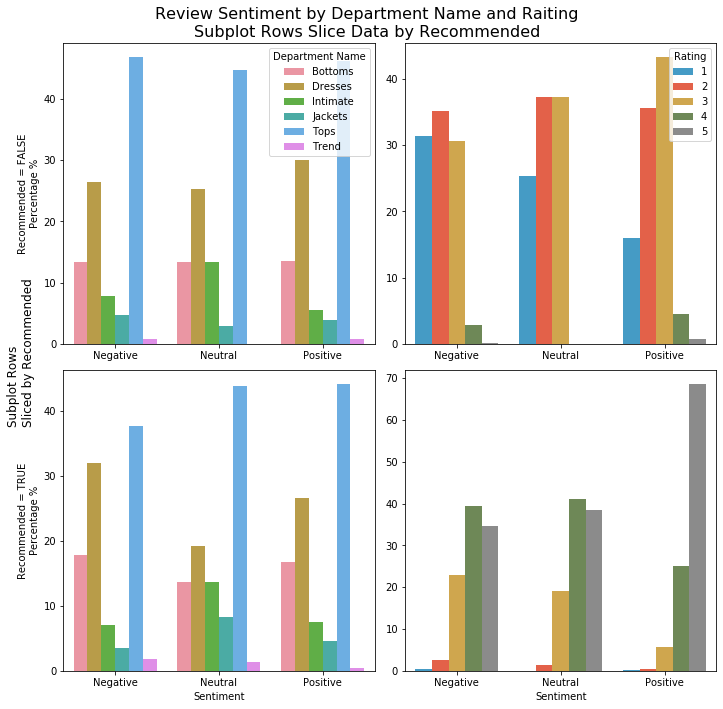

In [285]:
xvar = 'Sentiment'
huevar1 = 'Department Name'
huevar2 = 'Rating'
rowvar = 'Recommended IND'
fig,ax = plt.subplots(2,2,figsize = (10,10))
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x = xvar,y = 'Percentage',hue = huevar1,data = df[df[rowvar] == x],ax = ax[i,0],order = ['Negative','Neutral','Positive'])
    percentstandardize_barplot(x = xvar,y = 'Percentage',hue = huevar2,data = df[df[rowvar] == x],ax = ax[i,1],order = ['Negative','Neutral','Positive'])
ax[1,0].legend_.remove()
ax[1,1].legend_.remove()
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
ax[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
ax[1,1].set_title("")
fig.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
fig.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

How to Interpret:
In this plot, the upper and lower rows use the same variables, but the upper row is for non-recommended reviews, while the bottom row is for recommended reviews. This enables use to explore the nature of recommended reviews in terms of the mood of the writing, as well as the rating assigned by the customer.

Interpretation:
While the distribution of departments does not seem to change depending on status of recommendation, rating is almost entirely inverted. My previous theory that recommended reviews hold more criticizing weight does not hold up in this case since recommended reviews have a highly positive sentiment occurrence.

In this given plot the upper and lower rows use the same variables but the diffrence is upper row is for non-recommended reviews while the bottom row is for recommended reviews.This enables us to explore the nature of recommended reviews in terms of the mood of the writing as well as the rating assigned by the customer

In [ ]:
stopwords = set(STOPWORDS)
size = (10,7)
def cloud(text, title, stopwords=stopwords, size=size):
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    

In [291]:
stopwords = set(STOPWORDS)
size = (10,7)
def cloud(text,title,stopwords = stopwords,size = size):
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    wordcloud = WordCloud(width = 1600,height = 800,background_color = 'black',
                          stopwords = stopwords
                         ).generate(str(text))
    fig = plt.figure(figsize = size,dpi = 80,facecolor = 'k',edgecolor = 'k')
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.title(title,fontsize = 50,color = 'y')
    plt.tight_layout(pad = 0)
    plt.show()
    

In [292]:
def wordfreqviz(text,x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),columns = ['Word','Frequency']).set_index('Word')
    rslt.plot(kind = 'bar')
    
def wordfreq(text,x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),columns = ['Word','Frequency']).set_index('Word')
    return rslt